<center>
<img src="FIFA-19-Background-1-768x401.jpg" />
    
## Aprendizaje No Supervisado 2020 DiploDatos
    Laura Alonso Alemany, Ana Georgina Flesia y Valeria Rulloni
## Agrupamiento con el FIFA 2019 dataset
    
Material basado en notas de Ana Georgina Flesia bajo los términos y condiciones de la licencia [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/), a su vez basado de material de [SilveMel](https://www.kaggle.com/karangadiya/fifa19/downloads/data.csv/comments) y otros.

### Indice de temas
1. [Inicialización del entorno](#1.-Inicialización-del-entorno)
2. [Preparación de los datos](#2.-Preparación-de-los-datos)
3. [Clustering KM](#3.-Clustering-con-Kmeans)
4. [Clustering MS](#4.-Clustering-con-Mean-Shift)
5. [Clustering KM2](#5.-Clustering-con-Kmeans-sin-arqueros)
6. [Clustering MS2](#6.-Clustering-con-Mean-Shift-sin-arqueros)

##Objetivo:
    Agrupar jugadores usando características generales en cuatro grupos que representen posiciones preferidas del
    juego:
    
    Defensa
    Medio campo
    Ataque
    Arqueros
    

## 1.-Inicialización-del-entorno

Empezamos cargando algunas herramientas para cargar los datos y manipularlos.

In [189]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

Para visualización usamos plotly, pero podemos usar seaborn tambien, o matplotlib. 

In [190]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

## 2.-Preparación-de-los-datos

Cargamos los datos bajados de la database de [Kaggle](https://www.kaggle.com/karangadiya/fifa19) como 'data.csv'. 

In [191]:
df=pd.read_csv("https://raw.githubusercontent.com/melicaffa/AprendizajeNoSupervisado/master/players_20.csv")

**Preparamos la base para Clustering:**

**Retiramos jugadores con bajo Desempeño global ("Overall")**

**y consideramos Variables de desempeño por habilidad (skills_ratings)**

In [192]:
n=10000

df_n=df.loc[:n] #los primeros n
df_n=df_n[(df_n['overall']>70)] # mejores jugadores

skills_ratings = ['attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning','goalkeeping_reflexes']

print(len(skills_ratings))

df_skills=df_n[skills_ratings]


34


# 3.-Clustering-con-Kmeans

ES necesario definirle la cantidad de grupos/clusters (n_clusters), es un hiperparámetro del algoritmo. 


In [193]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

# Número de clusters buscado
n_clust = 5

km = KMeans(n_clusters=n_clust)
km.fit(df_skills)

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', km.inertia_)

Suma de los cuadrados de las distancias al cluster / Inertia:  11121711.690228019


**Elección de la cantidad de grupos/clusters**

Una forma de seleccionar la cantidad más adecuada de clusters es probar varias cantidades y usar el criterio del codo: "elbow method", utilizando una medida de ajuste que puede ser Inertia.

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

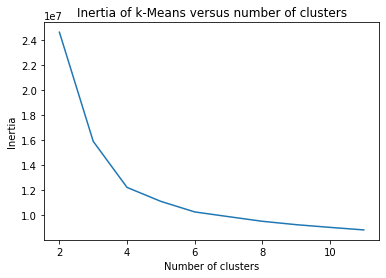

In [194]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i+2).fit(df_skills).inertia_ for i in range(10)]

from matplotlib import pyplot as plt
plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")
#intertia: within-cluster sum-of-squares 

In [195]:
#Se puede ver que la inertia comienza a esetabilizarse entre el valor 4 y 6 del numero de clusters.

**Graficamos el resultado kmedias con la cantidad de clases elegida: Visualizamos de a dos variables por vez**

In [196]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


#Eligo dos números entre 0 y  de n_skills-1
skill_1='movement_balance'
skill_2='mentality_interceptions'

#skill_1='defending_sliding_tackle'
#skill_2='attacking_short_passing'


kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [197]:
df_clusters=df_n.copy()
df_clusters['kmeans'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros forzamos la cantidad')

Kmeans encontró:  5 clusters, nosotros forzamos la cantidad


**EVALUACIÓN**

**EJERCICIO: Análisis exploratorio de los clusters, usando las clases asignadas por kmeans** 
- Cantidad de observaciones por Cluster
- Análisis descriptivo separando por Cluster
- Tabla de contingencia alguna categórica vs clusters
- Silohuette?


# Exploración

In [198]:
#Cantidad de clusters encontrados:
len(set(df_clusters['kmeans']))

5

In [199]:
df_clusters.groupby(by=['kmeans']).size()

kmeans
0     649
1     929
2     440
3    1075
4    1663
dtype: int64

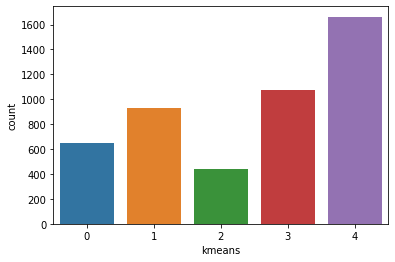

In [200]:
sns.countplot(data=df_clusters, x=df_clusters.kmeans)

In [201]:
df_clusters.groupby(by=['kmeans'])['team_position'].describe().T

kmeans,0,1,2,3,4
count,632,909,428,1056,1634
unique,14,16,3,23,26
top,SUB,SUB,GK,SUB,SUB
freq,243,280,279,363,523


In [202]:
interesting_skills=[skill_1,skill_2]

In [203]:
df_clusters.groupby(by=['kmeans'])[interesting_skills].describe().T

kmeans                                  0           1           2  \
movement_balance        count  649.000000  929.000000  440.000000   
                        mean    62.491525   54.613563   44.947727   
                        std     11.664564   11.814491   10.336458   
                        min     29.000000   26.000000   20.000000   
                        25%     56.000000   46.000000   38.000000   
                        50%     65.000000   56.000000   45.000000   
                        75%     71.000000   63.000000   52.250000   
                        max     92.000000   91.000000   69.000000   
mentality_interceptions count  649.000000  929.000000  440.000000   
                        mean    30.140216   73.624327   19.715909   
                        std      9.968952    4.727475    4.950665   
                        min     10.000000   61.000000    7.000000   
                        25%     22.000000   70.000000   16.000000   
                        50%     29.000000   73.000000   20.000000   
                        75%     37.000000   77.000000   23.000000   
                        max     61.000000   88.000000   30.000000   

kmeans                                   3            4  
movement_balance        count  1075.000000  1663.000000  
                        mean     77.763721    70.492483  
                        std       8.310545     9.807524  
                        min      41.000000    31.000000  
                        25%      72.000000    65.000000  
                        50%      77.000000    71.000000  
                        75%      84.000000    77.000000  
                        max      96.000000    94.000000  
mentality_interceptions count  1075.000000  1663.000000  
                        mean     39.090233    71.397474  
                        std      11.807198     6.536681  
                        min      12.000000    41.000000  
                        25%      30.000000    68.000000  
                        50%      39.000000    72.000000  
                        75%      48.000000    76.000000  
                        max      69.000000    92.000000

In [204]:
#Veamos si los grupos tienen alguna relación con la posicion de los jugadores:
plt.figure(figsize=(10,6))
contingencia0 = pd.crosstab(df_clusters.kmeans, df_clusters.team_position)
contingencia0

team_position,CAM,CB,CDM,CF,CM,GK,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,RAM,RB,RCB,RCM,RDM,RES,RF,RM,RS,RW,RWB,ST,SUB
kmeans,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,7,0,0,3,0,0,2,0,0,1,0,1,12,55,8,0,0,0,0,0,0,33,0,11,58,7,0,191,243
1,0,34,13,0,2,0,0,14,222,5,13,0,2,0,0,1,0,22,233,7,14,44,0,0,0,0,3,0,280
2,0,0,0,0,0,279,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,0,0,0,131
3,97,0,1,6,3,0,10,0,0,41,3,7,125,28,60,2,11,0,0,21,1,64,5,101,30,54,1,22,363
4,44,6,68,0,25,0,1,150,34,107,83,3,26,1,3,11,2,154,29,130,81,87,2,40,0,8,13,3,523


<Figure size 720x432 with 0 Axes>

<Figure size 864x576 with 0 Axes>

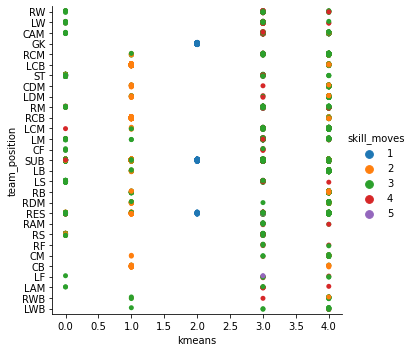

In [205]:
#Visualmente..
#Tendrá algo que ver la posicion del jugador con los skill moves??

plt.figure(figsize=(12,8))
sns.catplot(data=df_clusters, x="kmeans", y="team_position", hue="skill_moves")

En todos los clusters hay jugadores en varias posiciones y la cantidad va descendiendo según el número de cluster, y en el 1 se ve sólo 1 habilidad que parece pertenecer a 3 posiciones solamente. En el cluster cero pareciera haber más jugadores con habilidades 3 y 4, mientras que en el dos, habilidades con 2 y 3.

In [206]:
#vamos a comprobrarlo..
plt.figure(figsize=(10,6))
contingencia2 = pd.crosstab(df_clusters.kmeans, df_clusters.skill_moves)
contingencia2

skill_moves,1,2,3,4,5
kmeans,,,,,
0,0,56,517,74,2
1,0,830,99,0,0
2,440,0,0,0,0
3,0,1,510,525,39
4,0,222,1220,217,4


<Figure size 720x432 with 0 Axes>

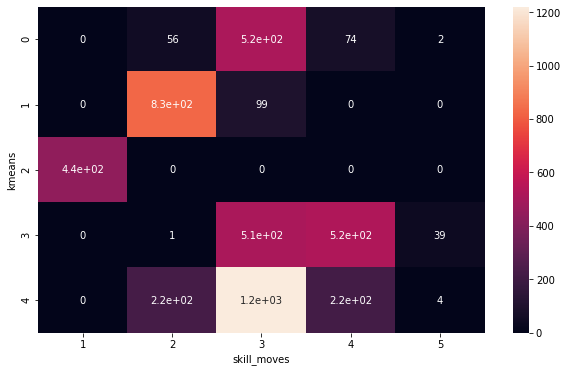

In [207]:
plt.figure(figsize=(10,6))
sns.heatmap(contingencia2, annot=True)

Hay más personas con habilidad de movimiento 3 en el cluster 0! y en el cluster 3 tenemos las habilidades más altas.

In [208]:
#tabla de contingencia de las habilidades de movimiento de los jugadores con la posicion del jugador en el cluster 3
plt.figure(figsize=(10,6))
contingencia3 = pd.crosstab(df_clusters[df_clusters.kmeans==1].skill_moves, df_clusters[df_clusters.kmeans==1].team_position)
contingencia3

team_position,CB,CDM,CM,LB,LCB,LCM,LDM,LM,LWB,RB,RCB,RCM,RDM,RES,RWB,SUB
skill_moves,,,,,,,,,,,,,,,,
2,31,11,2,8,212,3,9,0,0,8,227,5,10,39,1,245
3,3,2,0,6,10,2,4,2,1,14,6,2,4,5,2,35


<Figure size 720x432 with 0 Axes>

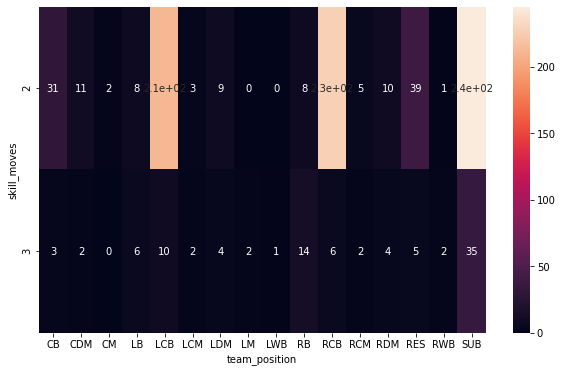

In [209]:
plt.figure(figsize=(10,6))
sns.heatmap(contingencia3, annot=True)

En el cluster 3 hay más jugadores con skills moves 2 que juegan como SUB, RB Y LCB

In [210]:
#Vemos algunas otras características..

In [211]:
plt.figure(figsize=(10,6))
contingencia6 = pd.crosstab(df_clusters.kmeans, df_clusters.work_rate)
contingencia6

work_rate,High/High,High/Low,High/Medium,Low/High,Low/Medium,Medium/High,Medium/Low,Medium/Medium
kmeans,,,,,,,,
0,72,87,194,0,1,16,104,175
1,25,2,63,95,78,292,1,373
2,0,0,0,0,0,0,0,440
3,84,123,406,0,0,13,129,320
4,284,28,456,28,19,274,9,565


<Figure size 720x432 with 0 Axes>

No parece haber una correlación de los clusters con la posición de los jugadores al menos no de la forma más directa.

Podemos empezar a sospechar de si el número de clusters elegido es el correcto, o si estamos observando con las variables apropiadas.

Empezaremos por preguntarnos cuál es el par donde se puede ver una mayor separación de los centroides de los grupos encontrados por kmeans 

# Mejores variables

In [212]:
cent=km.cluster_centers_

In [213]:
centroide_kmean=pd.DataFrame(data=cent, columns=skills_ratings)
centroide_kmean

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,55.285054,75.365177,73.365177,67.126348,69.138675,71.057011,59.984592,51.580894,52.545455,72.775039,69.869029,71.506934,68.320493,71.847458,62.491525,75.801233,73.226502,69.465331,76.944530,67.281972,63.229584,30.140216,75.850539,62.975347,69.540832,70.776579,33.075501,28.841294,24.269646,10.659476,10.690293,10.727273,10.554700,10.608629
1,47.111948,34.729817,72.536060,66.325081,34.748116,53.512379,41.364909,36.879440,62.017223,62.586652,57.809473,60.503767,55.524220,69.817008,54.613563,56.674919,72.960172,68.516685,79.327234,40.254037,75.902045,73.624327,40.519914,48.616792,44.302476,67.595264,73.470398,75.279871,72.975242,10.648009,10.831001,10.721206,10.790097,10.649085
2,14.945455,13.175000,14.909091,30.352273,13.706818,15.400000,15.740909,15.034091,29.470455,22.768182,44.488636,44.452273,46.302273,71.136364,44.947727,52.845455,64.925000,33.927273,65.977273,13.956818,29.429545,19.715909,12.756818,46.470455,22.175000,53.890909,16.902273,14.579545,14.352273,75.765909,72.715909,70.279545,74.331818,77.222727
3,70.887546,69.914498,53.302045,73.250000,65.454461,77.872677,72.076208,65.884758,66.375465,76.949814,79.594796,77.815056,80.934015,71.848513,77.760223,73.225836,62.618959,70.469331,59.344796,70.211896,54.434944,39.102230,72.399628,72.406134,65.489777,71.745353,40.052974,38.533457,34.744424,10.578996,10.618030,10.601301,10.482342,10.440520
4,68.928400,57.069795,62.447052,74.964501,55.845367,71.888688,66.097473,58.936823,71.123947,74.422383,70.098676,69.631769,71.376655,73.088448,70.490373,71.410349,69.279182,77.832732,69.641998,65.149819,73.049940,71.409146,65.941637,69.027076,58.297834,72.152226,69.478941,72.061974,69.392298,10.595668,10.651023,10.805656,10.748496,10.643201


In [214]:
centroide_kmean.describe()

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,51.431681,50.050858,55.311885,62.403640,47.778687,57.946151,51.052818,45.663201,56.306509,61.900414,64.372122,64.781960,64.491531,71.547558,62.060682,65.991558,68.601963,64.042270,70.247166,51.370908,59.209212,46.798366,53.493707,59.899161,51.961184,67.232066,46.596017,45.859228,43.146777,23.649612,23.101251,22.626996,23.381490,23.912832
std,22.635255,25.880531,24.030862,18.305672,23.261779,25.461681,22.852175,20.220141,16.491452,22.546309,13.538469,12.944175,13.635275,1.195694,12.903814,10.458819,4.747509,17.232433,8.135758,24.090466,18.681555,24.471956,26.645948,11.798603,19.222985,7.669089,24.254870,26.804168,26.620640,29.133916,27.735556,26.638685,28.482390,29.801258
min,14.945455,13.175000,14.909091,30.352273,13.706818,15.400000,15.740909,15.034091,29.470455,22.768182,44.488636,44.452273,46.302273,69.817008,44.947727,52.845455,62.618959,33.927273,59.344796,13.956818,29.429545,19.715909,12.756818,46.470455,22.175000,53.890909,16.902273,14.579545,14.352273,10.578996,10.618030,10.601301,10.482342,10.440520
25%,47.111948,34.729817,53.302045,66.325081,34.748116,53.512379,41.364909,36.879440,52.545455,62.586652,57.809473,60.503767,55.524220,71.136364,54.613563,56.674919,64.925000,68.516685,65.977273,40.254037,54.434944,30.140216,40.519914,48.616792,44.302476,67.595264,33.075501,28.841294,24.269646,10.595668,10.651023,10.721206,10.554700,10.608629
50%,55.285054,57.069795,62.447052,67.126348,55.845367,71.057011,59.984592,51.580894,62.017223,72.775039,69.869029,69.631769,68.320493,71.847458,62.491525,71.410349,69.279182,69.465331,69.641998,65.149819,63.229584,39.102230,65.941637,62.975347,58.297834,70.776579,40.052974,38.533457,34.744424,10.648009,10.690293,10.727273,10.748496,10.643201
75%,68.928400,69.914498,72.536060,73.250000,65.454461,71.888688,66.097473,58.936823,66.375465,74.422383,70.098676,71.506934,71.376655,71.848513,70.490373,73.225836,72.960172,70.469331,76.944530,67.281972,73.049940,71.409146,72.399628,69.027076,65.489777,71.745353,69.478941,72.061974,69.392298,10.659476,10.831001,10.805656,10.790097,10.649085
max,70.887546,75.365177,73.365177,74.964501,69.138675,77.872677,72.076208,65.884758,71.123947,76.949814,79.594796,77.815056,80.934015,73.088448,77.760223,75.801233,73.226502,77.832732,79.327234,70.211896,75.902045,73.624327,75.850539,72.406134,69.540832,72.152226,73.470398,75.279871,72.975242,75.765909,72.715909,70.279545,74.331818,77.222727


Planteamos hacer un análisis de las correlaciones entre los centroides que indican cada variable en cada grupo, y en donde haya menos correlación es donde los centroides más se van a alejar. 

In [215]:
correlaciones=centroide_kmean.corr()

In [216]:
correlaciones

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
attacking_crossing,1.000000,0.861394,0.714708,0.966259,0.886353,0.977588,0.984469,0.985365,0.934360,0.969263,0.955607,0.959551,0.937602,0.521432,0.951069,0.837696,0.066528,0.940036,-0.109048,0.954570,0.697161,0.491461,0.917766,0.892665,0.897282,0.968874,0.541105,0.521058,0.474947,-0.901550,-0.902268,-0.901321,-0.901969,-0.901825
attacking_finishing,0.861394,1.000000,0.680606,0.815288,0.998505,0.934206,0.929907,0.911841,0.650708,0.897427,0.938609,0.954012,0.906799,0.533703,0.843727,0.976775,0.146082,0.786857,-0.039098,0.971869,0.489404,0.073366,0.989630,0.866557,0.991933,0.882095,0.148002,0.111831,0.052351,-0.796659,-0.797952,-0.797007,-0.798872,-0.797438
attacking_heading_accuracy,0.714708,0.680606,1.000000,0.861326,0.697588,0.792143,0.676570,0.641640,0.757123,0.852837,0.614597,0.705255,0.507868,0.022708,0.483338,0.568853,0.709923,0.891781,0.597690,0.720248,0.930891,0.614964,0.732775,0.391276,0.761413,0.861800,0.684092,0.646218,0.602027,-0.939481,-0.939116,-0.939377,-0.939136,-0.939089
attacking_short_passing,0.966259,0.815288,0.861326,1.000000,0.842411,0.965180,0.928100,0.919418,0.960703,0.986618,0.882214,0.916702,0.832055,0.347549,0.844039,0.754319,0.288803,0.991686,0.131337,0.911668,0.848733,0.625152,0.882481,0.753540,0.876701,0.991041,0.681145,0.655855,0.610113,-0.979002,-0.979250,-0.978766,-0.978909,-0.979000
attacking_volleys,0.886353,0.998505,0.697588,0.842411,1.000000,0.950615,0.946763,0.929591,0.688903,0.916963,0.949153,0.964412,0.917893,0.545729,0.861869,0.976641,0.151627,0.816035,-0.036154,0.983100,0.523664,0.122908,0.995903,0.878979,0.995399,0.903887,0.195703,0.160689,0.101891,-0.818970,-0.820221,-0.819224,-0.820989,-0.819672
skill_dribbling,0.977588,0.934206,0.792143,0.965180,0.950615,1.000000,0.984407,0.974915,0.877811,0.992449,0.964798,0.985656,0.927107,0.464621,0.910909,0.890862,0.181939,0.941778,0.004264,0.985220,0.706144,0.403104,0.970639,0.863964,0.965194,0.987118,0.467801,0.438336,0.385009,-0.934375,-0.935141,-0.934409,-0.935335,-0.934784
skill_curve,0.984469,0.929907,0.676570,0.928100,0.946763,0.984407,1.000000,0.997863,0.857946,0.959322,0.986628,0.985756,0.972921,0.580743,0.964091,0.915982,0.030716,0.895825,-0.155549,0.987420,0.605288,0.338014,0.964257,0.937637,0.946290,0.953107,0.394267,0.370477,0.319483,-0.864248,-0.865279,-0.864192,-0.865352,-0.864756
skill_fk_accuracy,0.985365,0.911841,0.641640,0.919418,0.929591,0.974915,0.997863,1.000000,0.862052,0.947293,0.989065,0.981897,0.981503,0.580187,0.978740,0.899327,-0.026796,0.881208,-0.209471,0.975983,0.580065,0.336657,0.947285,0.945936,0.927025,0.939877,0.389884,0.368371,0.318936,-0.847290,-0.848320,-0.847270,-0.848383,-0.847857
skill_long_passing,0.934360,0.650708,0.757123,0.960703,0.688903,0.877811,0.857946,0.862052,1.000000,0.907861,0.799005,0.818547,0.767232,0.328197,0.820102,0.602710,0.178695,0.952166,0.041941,0.802063,0.840989,0.761817,0.745199,0.700957,0.725203,0.919386,0.796486,0.783830,0.750752,-0.910075,-0.910052,-0.909544,-0.909081,-0.909833
skill_ball_control,0.969263,0.897427,0.852837,0.986618,0.916963,0.992449,0.959322,0.947293,0.907861,1.000000,0.928899,0.961656,0.879024,0.389384,0.868814,0.839079,0.270015,0.971564,0.101538,0.959945,0.784653,0.493613,0.944100,0.802330,0.942797,0.998204,0.558401,0.528279,0.476583,-0.970439,-0.970954,-0.970411,-0.971017,-0.970678


In [217]:
minimo_corr=[]
for i in correlaciones.columns:
    minimo_corr.append(correlaciones[i].abs().min())

In [218]:
minimo={'minimo':minimo_corr}
ma=pd.DataFrame(data=minimo)
ma

,minimo
0,0.066528
1,0.039098
2,0.022708
3,0.131337
4,0.036154
5,0.004264
6,0.030716
7,0.026796
8,0.041941
9,0.101538


In [219]:
corr_min=ma['minimo'].sort_values(ascending=True)
corr_min[0:2]

28    0.002793
15    0.002793
Name: minimo, dtype: float64

Encontramos que la variable número 28 de la tabla de correlaciones es la que tiene la menor correlación con...

In [220]:
#Veamos cuáles eran estas variables
correlaciones.columns[28]

'defending_sliding_tackle'

In [ ]:
correlaciones[correlaciones.columns[28]].abs().idxmin()

'power_shot_power'

A continuacion graficamos una comparacion entre la variable de menor correlacion (defending_sliding_tackle), con el resto, para ver si a simple vista se pueden detectar posibles clusters.

In [ ]:
import matplotlib.cm as cm
from matplotlib import pyplot as plt
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86

_, ax=plt.subplots(6,6, figsize=(18,18))
selec_skill=28
for i in range(34):
    ax[i%6][i//6].scatter(df_skills[skills_ratings[elmejor]], df_skills[skills_ratings[i]], marker='.', s=30, lw=0, alpha=0.7, edgecolor='k')
    ax[i%6][i//6].set_title(i)

Vemos que utilizar las variables arrojadas por el analisis de correlacion parece ser una buena idea, ya que se aprecia la aparicion de cumulos de puntos (dicho grafico corresponde al ubicado en la fila 4 columna 3, el titulo es 15). Viendo las otras graficas no nos parece que usar otras variables sea mas ventajoso.


A través del análisis realizado, se elegirán las variables 'defending_sliding_tackle' y
'power_shot_power', ya que son aquellas las que poseen la mínima correlación.


In [ ]:
#visualizamos..
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


#Eligo dos números entre 0 y  de n_skills-1
skill_1='power_shot_power'
skill_2='defending_sliding_tackle'

#skill_1='defending_sliding_tackle'
#skill_2='attacking_short_passing'


kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

Sin embargo sigue habiendo un solapamiento, veamos cuáles son las distribuciones de éstas variables en los clusters

In [ ]:
skills_ratings.index('defending_sliding_tackle')

In [ ]:
skills_ratings.index('power_shot_power')

In [ ]:
columnas_encontradas=[df_skills.columns[28],df_skills.columns[15]]

In [ ]:
#Visualizamos 
plt.figure(figsize=(14,12))
sns.pairplot(data=df_clusters, vars=columnas_encontradas, hue='kmeans')

Podemos ver que por lo menos hay una distribución (cluster 3) que se solapa casi completamente con la distribución 1 en el grafico de distribución de 'defending_sliding_tackle', y lo mismo pasa con los clusters 0, 1 y 4 en la distribución de 'power_shot_power'.

Analizaremos el coeficiente de sillhoutte y corroboraremos si es necesario cambiar el número de cluster para evitar este solapamiento.

# Silhoutte

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [ ]:
range_n_clusters=[2,3,4,5,6,7,8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_skills) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_skills)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_skills, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_skills, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_skills['power_shot_power'], df_skills['defending_sliding_tackle'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,15], centers[:,28], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

A medida que va aumentando el numero de clusters, el coefficiente de sillhouette baja, lo que quiere decir que 
aumenta el solapamiento a medida que aumentamos el número de clusters.

Podemos ver cómo mejora el coficiente al bajar de 5 a 4 el número de clusters, por lo que podríamos bajar el número a 4 o incluso a 3.

In [ ]:
# Teníamos que:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

# Número nuevo de clusters buscado
n_clust = 4

km = KMeans(n_clusters=n_clust)
km.fit(df_skills)

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', km.inertia_)

In [ ]:
# Graficando más grande..
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


#Eligo dos números entre 0 y  de n_skills-1

skill_1=skills_ratings[15]
skill_2=skills_ratings[28]


kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [ ]:
df_clusters=df_n.copy()
df_clusters['kmeans'] = km.labels_ #clusters

In [ ]:
#Veamos los gráficos de distribución..
plt.figure(figsize=(14,12))
sns.pairplot(data=df_clusters, vars=columnas_encontradas, hue='kmeans')

Como se puede apreciar a través de los gráficos, al descender el número de clusters 
se produce menos solapamiento entre ellos. Lo que puede significar que forzar a 
kmeans a 5 clusters no es un enfoque adecuado para estas condiciones.

Haciendo el mismo análisis que con 5 clusters..

In [ ]:
df_clusters.groupby(by=['kmeans']).size()

In [ ]:
sns.countplot(data=df_clusters, x=df_clusters.kmeans)

In [ ]:
df_clusters.groupby(by=['kmeans'])['team_position'].describe().T

In [ ]:
plt.figure(figsize=(12,8))
sns.catplot(data=df_clusters, x="kmeans", y="team_position", hue="skill_moves")

In [ ]:
#vamos analizar si hay alguna relación entre la posición del jugador y los clusters formados..
plt.figure(figsize=(10,6))
contingenciag = pd.crosstab(df_clusters.kmeans, df_clusters.team_position)
contingenciag

In [ ]:

plt.figure(figsize=(10,6))
sns.heatmap(contingenciag, annot=True)

Hay mayor cantidad de jugadores SUB en el cluster 0 y le sigue RB Y LB, más GK en el cluster 1, en el cluster 2 hay  más SUB y le sigue ST, en el 3 hay mayor cantidad de jugadores SUB  y le sigue RCB.

En cluster 1 estarían todos los arqueros, pues tienen una sóla habilidad según el catplot que se graficó al prinicipio de la exploración. Se podría considerar a SUB como aquellos jugadores juveniles que pueden tomar cualquier posición, ya que parece estar con predominancia en todos los clusters.

In [ ]:
#Si lo vemos matricialmente..
plt.figure(figsize=(10,6))
contingencia2 = pd.crosstab(df_clusters.kmeans, df_clusters.skill_moves)
contingencia2

In [ ]:

plt.figure(figsize=(10,6))
sns.heatmap(contingencia2, annot=True)

El cluster 0 tiene más habilidades 3, el cluster 1 tiene más habilidades de tipo 1, el cluster 2 tiene más habilidades de tipo 3 y el cluster 3 tiene más habilidades de tipo 2.. La mayor cantidad de jugadores con habilidades tipo 5 están en el cluster 2.

In [ ]:
#Veamos las relaciones entre los skill_moves y la posicion del jugador en el cluster 1
plt.figure(figsize=(10,6))
contingencia_c1 = pd.crosstab(df_clusters[df_clusters.kmeans==1].skill_moves, df_clusters[df_clusters.kmeans==1].team_position)
contingencia_c1

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(contingencia_c1, annot=True)

Podemos ver que el cluster 1 tiene tres posiciones. GK, RES, y SUB, sin embargo estas dos ultimas no representan una posición específica en la cancha

# 4.-Clustering-Mean-Shift 

- NO es necesario definirle la cantidad de grupos/clusters
- NO es escalable, computacionalmente es muy pesado. Cada dato tienen un proceso iterativo en donde en cada iteración considera los vecinos a menos de un radio de distancia.
- Hipeparámetros: radio (de cobertura para cálculo de media)

In [ ]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

ms = MeanShift(bandwidth=72)

ms.fit(df_skills)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Numero estimado de clusters para Mean Shift : %d" % n_clusters_)

# Etiquetas de los elementos de los clusters


In [ ]:
df_skills.columns

In [ ]:
#Usamos las variables encontradas en el prácitco 1

In [ ]:
skills_ratings.index('movement_balance')

In [ ]:
skills_ratings.index('mentality_interceptions')

In [ ]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[14]
skill_2=skills_ratings[21]


MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [ ]:
df_clusters['MeanShift'] = ms.labels_ #clusters2
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros lo forzamos')
print('Mean shift encontró ', max(ms.labels_)+1, 'clusters, según los hiperparámetros elegidos')

**EVALUACIÓN**

**EJERCICIO EN GRUPO: Análisis exploratorio de los clusters, usando las clases asignadas por MeanShift** 

1. Cantidad de observaciones por Cluster
2. Análisis descriptivo separando por Cluster
3. Tabla de contingencia alguna categórica vs clusters


In [ ]:
df_clusters.groupby(by=['MeanShift']).size()


In [ ]:
sns.countplot(data=df_clusters, x=df_clusters.MeanShift)

In [ ]:
df_clusters.groupby(by='MeanShift').describe(include='object')

In [ ]:
df_clusters.groupby(by='MeanShift').describe()[skills_ratings]

Podemos ver que la agrupación de los datos se encuentra muy desbalanceada, y esto se puede deber quizá a que tal vez se necesiten estandarizar los datos.

In [ ]:
from sklearn import preprocessing

In [ ]:
X=df_clusters[skills_ratings]
escalar=preprocessing.StandardScaler().fit(X)
X_scaled=escalar.transform(X) # numpyarray normalizado por columna

In [ ]:
X_scaled

In [ ]:
#MeanShift con las variables escaladas

ms = MeanShift(bandwidth=3, bin_seeding=True)

ms.fit(X_scaled)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Numero estimado de clusters para Mean Shift : %d" % n_clusters_)

# Etiquetas de los elementos de los clusters

In [ ]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[14]
skill_2=skills_ratings[21]


MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [ ]:
df_clusters['MeanShift'] = ms.labels_ #clusters2

In [ ]:
df_clusters.groupby(by='MeanShift').size()

In [ ]:
sns.countplot(data=df_clusters, x=df_clusters.MeanShift)

In [ ]:
skills_visibles=[skills_ratings[14],skills_ratings[21]]

In [ ]:
df_clusters.groupby(by='MeanShift').describe()[skills_visibles].T

In [ ]:
#tabla de contigencia
plt.figure(figsize=(10,6))
cont_meanshift = pd.crosstab(df_clusters.MeanShift, df_clusters.team_position)
cont_meanshift

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data=cont_meanshift )

Los jugadores SUB siguen predominando en todos los clusters. En el 1 predominan GK y en el 0 LCB y RCB.

In [ ]:
plt.figure(figsize=(10,6))
cont_meanshift_skills = pd.crosstab(df_clusters.MeanShift, df_clusters.skill_moves)
cont_meanshift_skills

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data=cont_meanshift_skills )

Habilidades 2 y 3 en el cluster 0, y habilidades de tipo 3 y 4 en el cluster 1

In [ ]:
#Veamos cómo son las distribuciones de los jugadores en los equipos y en los skill moves por cluster..
plt.figure(figsize=(10,6))
sns.catplot(data=df_clusters, x='MeanShift', y='team_position', hue='skill_moves')

**Pregunta: normalizamos/estandarizamos la base?**

Sí, ya la hemos normalizado

# 5.-Clustering-Jerárquico

In [ ]:
from sklearn.cluster import AgglomerativeClustering

n_clusters=4
agg_cluster=AgglomerativeClustering(n_clusters=n_clusters, linkage="average", affinity="cityblock")

agg_cluster.fit(df_skills)

clusters3 = agg_cluster.labels_

labels_unique = np.unique(clusters3)
n_clusters_ = len(labels_unique)

print("Numero de clusters encontrado por Agglomerative : %d" % n_clusters_)

In [ ]:
#Usamos las variables encontradas en el prácitco 1

In [ ]:
skills_ratings.index('movement_balance')

In [ ]:
skills_ratings.index('mentality_interceptions')

In [ ]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[14]
skill_2=skills_ratings[21]


MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters3.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Agglomerative",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [ ]:
df_clusters['Agglomerative'] = agg_cluster.labels_ #clusters3
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros lo forzamos')
print('Mean shift encontró ', max(ms.labels_)+1, 'clusters, según los hiperparámetros elegidos')
print('Agglomerative encontró ', max(agg_cluster.labels_)+1, 'clusters')

In [ ]:
df_clusters.groupby(by=['Agglomerative']).size()

In [ ]:
sns.countplot(data=df_clusters, x=df_clusters.Agglomerative)

In [ ]:
df_clusters.groupby(by='Agglomerative').describe(include='object')

In [ ]:
df_clusters.groupby(by='Agglomerative').describe()[skills_ratings]

In [ ]:
#tabla de contigencia

plt.figure(figsize=(10,6))
cont_agglomerative = pd.crosstab(df_clusters.Agglomerative, df_clusters.team_position)
cont_agglomerative

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data=cont_agglomerative)

- Se puede ver que el cluster 3 pertenece a la posición de GK, es por ello que se puede deducir que ese cluster pertenece a los arqueros. Sin embargo, tanto el cluster 1 como el 2 no proporcionan información relevante y el cluster 0 agrupa a casi todas las demás posiciones excepto el de los arqueros. ¡

- Al igual que sucedió anteriormente, podemos ver que la agrupación de los datos se encuentra muy desbalanceada, es por ello que realizaremos un dendograma para poder visualizar cómo se esta realizando el agrupamiento si forzamos a la realización de 4 clusters.

In [ ]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(df_skills, metric = "cityblock", method = "average"))

plt.title('Dendograma')
plt.ylabel('Distancias')
plt.show()

Según lo que se puede ver en el dendograma, sería más conveniente utilizar 2 clusters en vez de 4.

In [ ]:
# Agglomerative con las variables escaladas

n_clusters=2
agg_cluster=AgglomerativeClustering(n_clusters=n_clusters, linkage="average", affinity="cityblock")

agg_cluster.fit(df_skills)

clusters3 = agg_cluster.labels_

labels_unique = np.unique(clusters3)
n_clusters_ = len(labels_unique)

print("Numero de clusters encontrado por Agglomerative : %d" % n_clusters_)

In [ ]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[14]
skill_2=skills_ratings[21]


agglomerative_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters3.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[agglomerative_clusters,crack]

layout = go.Layout(title="Agglomerative",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [ ]:
df_clusters['Agglomerative'] = agg_cluster.labels_ #clusters3

In [ ]:
df_clusters.groupby(by='Agglomerative').size()

In [ ]:
sns.countplot(data=df_clusters, x=df_clusters.Agglomerative)

In [ ]:
skills_visibles=[skills_ratings[14],skills_ratings[21]]

In [ ]:
df_clusters.groupby(by='Agglomerative').describe()[skills_visibles].T

In [ ]:
#tabla de contigencia

plt.figure(figsize=(10,6))
cont_agglomerative = pd.crosstab(df_clusters.Agglomerative, df_clusters.team_position)
cont_agglomerative

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data=cont_agglomerative)

Se puede ver que el cluster 1 es la posición de GK, y un poco de SUB por lo que se puede deducir que es el grupo de los arqueros y los juveniles que tienen habilidades de arquero. Y el cluster 0 reune a todas las demás posiciones.

In [ ]:
plt.figure(figsize=(10,6))
cont_agglomerative_skills = pd.crosstab(df_clusters.Agglomerative, df_clusters.skill_moves)
cont_agglomerative_skills

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data=cont_agglomerative_skills )

In [ ]:
#Veamos cómo son las distribuciones de los jugadores en los equipos y en los skill moves por cluster..
plt.figure(figsize=(10,6))
sns.catplot(data=df_clusters, x='Agglomerative', y='team_position', hue='skill_moves')

Se puede ver que esta aproximación con 2 clusters, divide por un lado a los arqueros y por otro a todas las demás posiciones.

**Ahora vemos que agrupamientos podemos hacer excluyendo los arqueros**

# 5.-Clustering-con-Kmeans-sin-arqueros

In [ ]:
n=10000

df_n=df.loc[:n]
df_n=df_n[(df_n["team_position"]!='GK')&(df_n['overall']>69)]

skills_ratings = ['attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle']

df_skills=df_n[skills_ratings]


In [ ]:
df_skills.columns

Estandarizamos los valores..

In [ ]:
X=df_skills
escalar_2=preprocessing.StandardScaler().fit(X)
X_scaled=escalar_2.transform(X) 

In [ ]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

# Número de clusters buscado
n_clust = 4

km = KMeans(n_clusters=n_clust)
km.fit(X_scaled)

# Recuperacion de etiquetas
clusters = km.labels_


In [ ]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[15]
skill_2=skills_ratings[28]


kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=4,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

# 6.-Clustering-Mean-Shift-sin-arqueros 

In [ ]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition


ms = MeanShift(bandwidth=2, bin_seeding=True)

ms.fit(X_scaled)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Numero de clusters encontrado por Mean Shift : %d" % n_clusters_)


In [ ]:
df_skills.columns

In [ ]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


#Elijo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[14]
skill_2=skills_ratings[21]


MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [ ]:
df_clusters=df_skills
df_clusters['MeanShift'] = ms.labels_ #clusters2

In [ ]:
df_clusters.groupby(by='MeanShift').size()

In [ ]:
sns.countplot(data=df_clusters, x=df_clusters.MeanShift)

Nos fijamos si podemos mejorar esta visualizacion buscando las variables donde mejor se vea la separacion. Buscamos los centroides

In [ ]:
centroide_meanshift=pd.DataFrame(data=cluster_centers, columns=skills_ratings)
centroide_meanshift

In [ ]:
correlaciones1=centroide_kmean.corr()

In [ ]:
minimo_corr_meanshift=[]
for i in correlaciones1.columns:
    minimo_corr_meanshift.append(correlaciones1[i].abs().min())

In [ ]:
minimo1={'minimo':minimo_corr_meanshift}
pa=pd.DataFrame(data=minimo1)
pa

In [ ]:
corr_min_shift=pa['minimo'].abs().sort_values(ascending=True)
corr_min_shift[1:3]

In [ ]:
correlaciones1.columns[15]

In [ ]:
correlaciones1[correlaciones1.columns[15]].abs().idxmin()

In [ ]:
skills_ratings.index('defending_sliding_tackle')

In [ ]:
skills_ratings.index('power_shot_power')

In [ ]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


#Elijo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[28]
skill_2=skills_ratings[15]


MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [ ]:
df_clusters=df_skills
df_clusters['kmeans'] = km.labels_ #clusters
df_clusters['MeanShift'] = ms.labels_ #clusters2

# 6.-Clustering-con-Jerárquico-sin-arqueros

In [ ]:
from sklearn.cluster import AgglomerativeClustering

n_clusters=4
agg_cluster=AgglomerativeClustering(n_clusters=n_clusters, linkage="ward", affinity="euclidean")

agg_cluster.fit(X_scaled)

clusters3 = agg_cluster.labels_

labels_unique = np.unique(clusters3)
n_clusters_ = len(labels_unique)

print("Numero de clusters encontrado por Agglomerative : %d" % n_clusters_)

In [ ]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


#Elijo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[14]
skill_2=skills_ratings[21]


agglomerative_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters3.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[agglomerative_clusters,crack]

layout = go.Layout(title="Agglomerative",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [ ]:
df_clusters=df_skills
df_clusters['Agglomerative'] = agg_cluster.labels_ #clusters3

In [ ]:
df_clusters.groupby(by='Agglomerative').size()

In [ ]:
sns.countplot(data=df_clusters, x=df_clusters.Agglomerative)

**Análisis exploratorio de las clases**

**Análisis exploratorio de las clases**

# Kmeans

In [ ]:
df_clusters.groupby(by=['kmeans']).size()

In [ ]:
columnas_principales=[df_clusters.columns[15],df_clusters.columns[28] ]

In [ ]:
df_clusters.groupby(by=['kmeans'])[columnas_principales].describe()

In [ ]:
df_clusters.groupby(by=['kmeans']).count()#['attacking_crossing']

In [ ]:
df_clusters.groupby(by=['kmeans']).count()[columnas_principales]

In [ ]:
sns.pairplot(data=df_clusters, vars=columnas_principales, hue='kmeans')

# Mean shift

In [ ]:
df_clusters.groupby(by=['MeanShift']).size()

In [ ]:
df_clusters.groupby(by=['MeanShift']).count()[columnas_principales]

In [ ]:
sns.pairplot(data=df_clusters, vars=columnas_principales, hue='MeanShift')

Al hacer el análisis sin arqueros, se puede apreciar que todos los clusters se agrupan entre sí en 
algun punto. Concluyendo que las habilidades de los jugadores ya sean mediocampistas, defensores o atacantes
se comparten entre sí. Predominando algunas dependiendo al gupo que pertenezcan pero se comparten, a diferencia
de las habilidades de los arqueros que son propias de esta categoría formando un cluster totalmente separado.